# iCCD Data Preparation - Terrys Samples

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import iCCD_dataprep as pl
import pandas as pd

In [2]:
series = 'Terry'
sample = '17'
fluence = '750uW'
date = '240815'
if None in [series,sample,fluence,date]:
    print('NOT SO FAST BUSTER! ASSIGN ATTRIBUTES!!!')

In [3]:
fluences = pl.calc_fluences(P=[750],wl=600,d=500,di=2082,A=0.8, f = 10e3,a=1780,b=1555,areaType='gauss',save=True,filename=series+'_'+date)


               Parameters                    Values
0          Measured Power                     [750]
1              Absorption                  0.841511
2         Spot Area/ cm^2                  0.034045
3    Sample Thickness/ nm                       500
4     Pump Wavelength/ nm                       600
5  Carrier Density/ cm^-3  [1.0646285408036085e+17]
6   Power Fluence/ uJcm-2     [0.02202976841319937]
7  Energy Fluence/ nJcm-2      [2202.9768413199367]


   t_start     dt   n   t_end  t_next  t_real
0    0.071  0.005  21   0.176   0.144   0.105
1    0.125  0.020  23   0.585   0.447   0.460
2    0.430  0.060  18   1.510   1.186   1.080
3    1.100  0.150  18   3.800   2.990   2.700
4    2.500  0.500  18  11.500   8.800   9.000


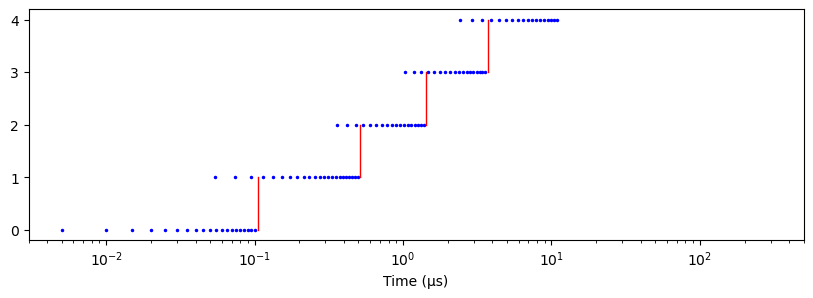

In [4]:
t0 = 0.071

r0 = pl.one_window(t0, 0.005,21)
r1 = pl.one_window(0.125, 0.02, 23)
r2 = pl.one_window(0.43, 0.06, 18)
r3 = pl.one_window(1.10, 0.15, 18)
r4 = pl.one_window(2.5, .5, 18)
#r5 = pl.one_window(8, 1.2, 15)
#r6 = pl.one_window(15, 4, 15)
#r7 = pl.one_window(24, 4, 14)
# r8 = pl.one_window(11, 2, 5)

tdf = pd.DataFrame([r0,r1,r2,r3,r4],columns = ['t_start','dt','n','t_end','t_next','t_real'])
pl.timesplot(tdf, t0)
print(tdf)

In [5]:
files = [file for file in os.listdir() if file.endswith('sig.asc') and file.startswith('TRPL') and sample in file and 'BACKGROUND'not in file]
files = files[1:]
files

['TRPL_Terry_17_750uW_1_sig.asc',
 'TRPL_Terry_17_750uW_2_sig.asc',
 'TRPL_Terry_17_750uW_3_sig.asc',
 'TRPL_Terry_17_750uW_4_sig.asc',
 'TRPL_Terry_17_750uW_5_sig.asc']

In [6]:
data = []
for f in files:
    data.append(pl.loadASC(f,plot=False))

------------------------------------------------
        TRPL_Terry_17_750uW_1_sig

        Start Time (ns):          71.0
        Gate Width (ns):          5
        Gate Step (ns):           5
        Number in Series:         21
        End Time (ns):            176.0
        Elapsed Time (ns):        100.0
        Central Wavlength (nm):   700.04
------------------------------------------------
Times: [ 73.5  78.5  83.5  88.5  93.5  98.5 103.5 108.5 113.5 118.5 123.5 128.5
 133.5 138.5 143.5 148.5 153.5 158.5 163.5 168.5 173.5]
------------------------------------------------
        TRPL_Terry_17_750uW_2_sig

        Start Time (ns):          125.0
        Gate Width (ns):          20
        Gate Step (ns):           20
        Number in Series:         23
        End Time (ns):            585.0
        Elapsed Time (ns):        440.0
        Central Wavlength (nm):   700.04
------------------------------------------------
Times: [135. 155. 175. 195. 215. 235. 255. 275. 295. 315.

No. of data points cropped by max: 1


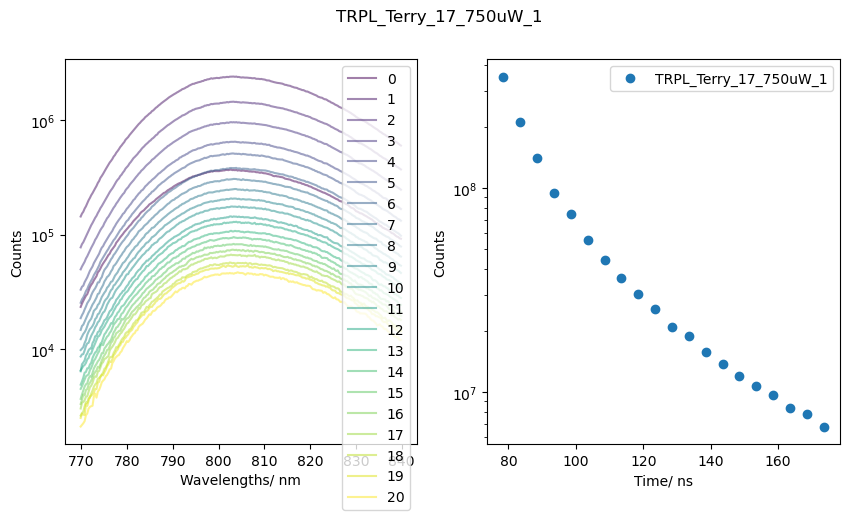

No. of data points cropped by max: 0


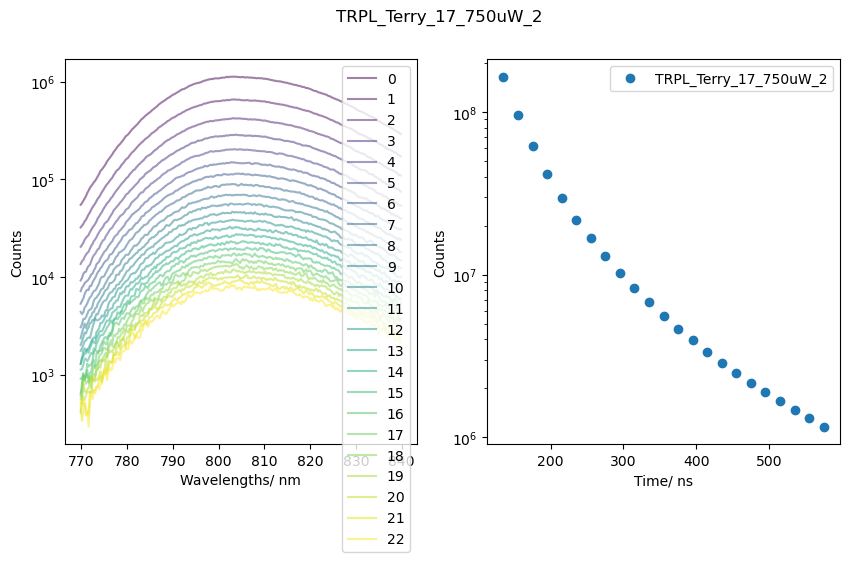

No. of data points cropped by max: 0


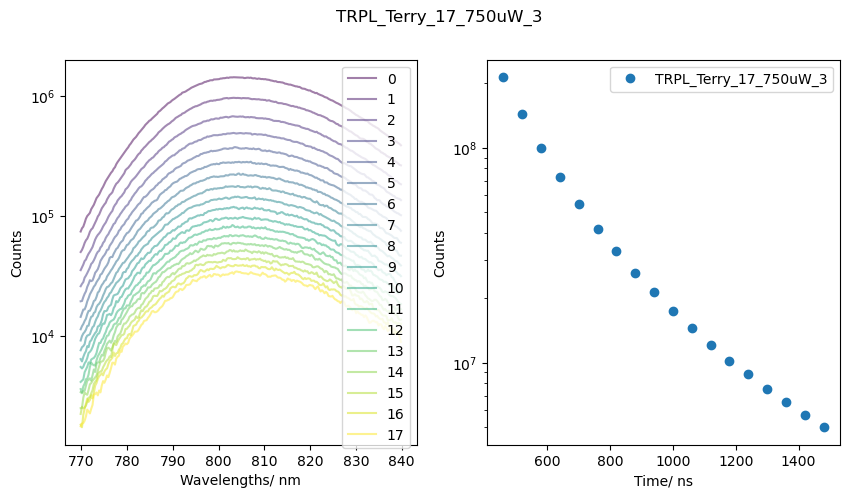

No. of data points cropped by max: 0


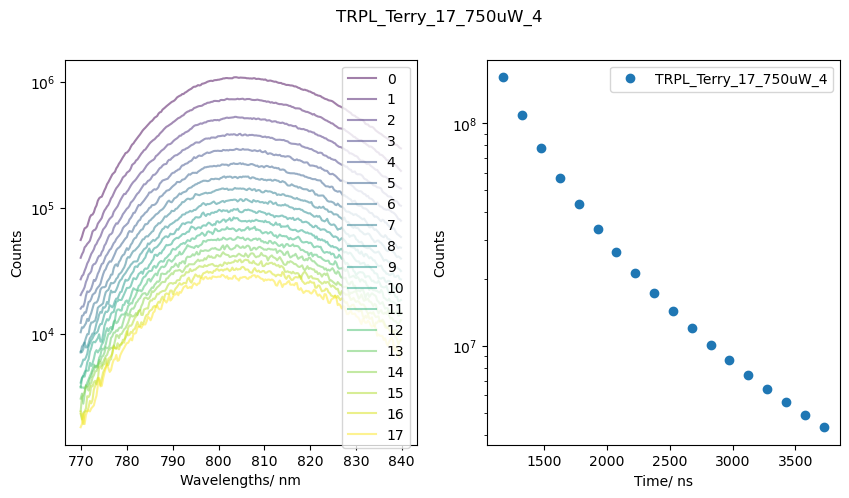

No. of data points cropped by max: 0


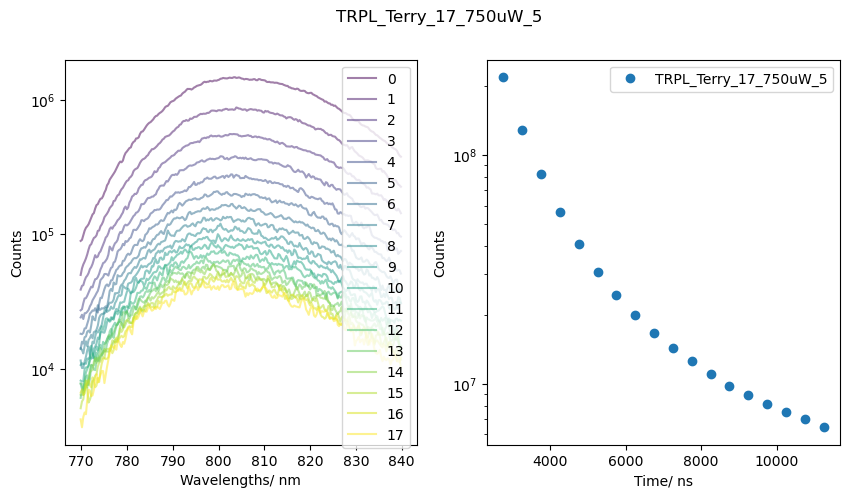

In [7]:
PL_decays = []
for d,f in zip(data,files):
    PL_decays.append(pl.PLdecay(d,wlmin=770,wlmax=840,label=f[:-8], normalise=False, smooth=False))
#PL_decays[0] = PL_decays[0][:,1:]    #Check this - normally first peak is actually pump scatter or not quite max

[9 9 9]
done stitch 0 mean=9.0
[88 88 88]
done stitch 1 mean=88.0
[15 15 15]
done stitch 2 mean=15.0
[19 19 19]
done stitch 3 mean=19.0


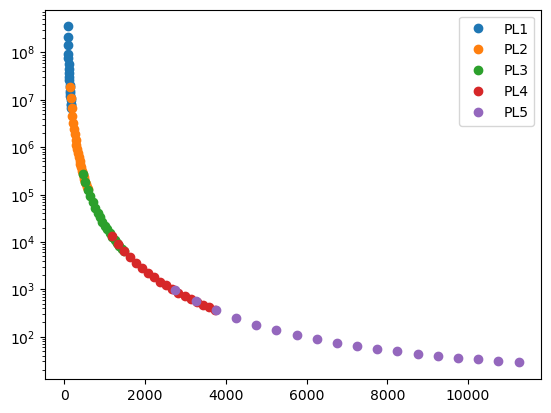

iCCD_Terry_240815_750uW_17


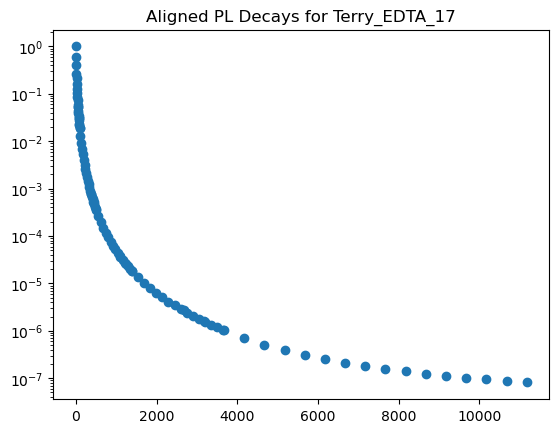

In [13]:
ratios = pl.scaling(PL_decays)
aligned = pl.plot_aligned(PL_decays,ratios,adjust=[1,1,1,1,1,1.3,2.2],save=True,xscale='linear',
                          normalise=True, title = series+'_EDTA_'+sample,
                          path = r'c:\Users\bail2.BLUE\OneDrive - University of Cambridge\Documents\1PhD\2024\iCCD\240812_Terry\Higher',
                          filename='iCCD_'+series+'_'+date+'_'+fluence+'_'+sample)

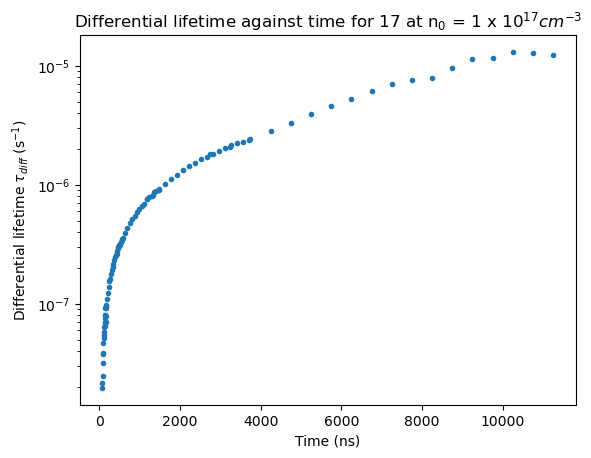

array([[7.85000000e+01, 8.35000000e+01, 8.85000000e+01, 9.35000000e+01,
        9.85000000e+01, 1.03500000e+02, 1.08500000e+02, 1.13500000e+02,
        1.18500000e+02, 1.23500000e+02, 1.28500000e+02, 1.33500000e+02,
        1.38500000e+02, 1.43500000e+02, 1.48500000e+02, 1.53500000e+02,
        1.58500000e+02, 1.63500000e+02, 1.68500000e+02, 1.73500000e+02,
        1.35000000e+02, 1.55000000e+02, 1.75000000e+02, 1.95000000e+02,
        2.15000000e+02, 2.35000000e+02, 2.55000000e+02, 2.75000000e+02,
        2.95000000e+02, 3.15000000e+02, 3.35000000e+02, 3.55000000e+02,
        3.75000000e+02, 3.95000000e+02, 4.15000000e+02, 4.35000000e+02,
        4.55000000e+02, 4.75000000e+02, 4.95000000e+02, 5.15000000e+02,
        5.35000000e+02, 5.55000000e+02, 5.75000000e+02, 4.60000000e+02,
        5.20000000e+02, 5.80000000e+02, 6.40000000e+02, 7.00000000e+02,
        7.60000000e+02, 8.20000000e+02, 8.80000000e+02, 9.40000000e+02,
        1.00000000e+03, 1.06000000e+03, 1.12000000e+03, 1.180000

In [9]:
pl.diff_lifetime(aligned[1],aligned[0],plot=True,title=f'{sample} at n$_0$ = 1 x 10$^{{17}}cm^{{-3}}$')



PL Stability Against Time

In [10]:
PL_files = [file for file in os.listdir() if file.startswith('PL') and file.endswith('sig.asc') and sample in file] # Selects files to stitch change this to include defining elements of your file names

for i, f in enumerate(PL_files):
    print(i, f)
    
#If you want to reorder the files to stitch in a different order, you can do so here
print('')
new_order = [0,2,5,7,1,3,4,6]
if new_order:
    PL_files = [PL_files[i] for i in new_order]

    for i, f in enumerate(PL_files):
        print(i, f)

0 PL_Terry_17_750uW_0Min_sig.asc
1 PL_Terry_17_750uW_16Min_sig.asc
2 PL_Terry_17_750uW_1Min_sig.asc
3 PL_Terry_17_750uW_22Min_sig.asc
4 PL_Terry_17_750uW_29Min_sig.asc
5 PL_Terry_17_750uW_2Min_sig.asc
6 PL_Terry_17_750uW_51Min_sig.asc
7 PL_Terry_17_750uW_7Min_sig.asc

0 PL_Terry_17_750uW_0Min_sig.asc
1 PL_Terry_17_750uW_1Min_sig.asc
2 PL_Terry_17_750uW_2Min_sig.asc
3 PL_Terry_17_750uW_7Min_sig.asc
4 PL_Terry_17_750uW_16Min_sig.asc
5 PL_Terry_17_750uW_22Min_sig.asc
6 PL_Terry_17_750uW_29Min_sig.asc
7 PL_Terry_17_750uW_51Min_sig.asc


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


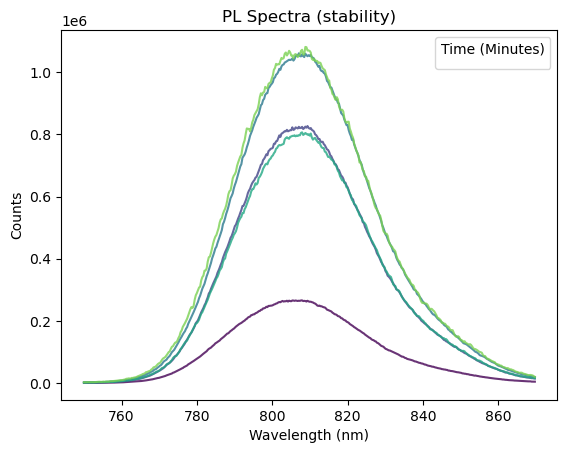

In [11]:
# Load PL Spectra measured against time for stability - label is to be used in the plot legend for minutes of measurement
# For label, use indices in the filename to extract the time of measurement and call as list in below function
PL_spectra, mins = pl.PL_spec(files,cwl=750,wlmin=750,wlmax=870, plot=True, label=[18,-11], yscale ='linear')

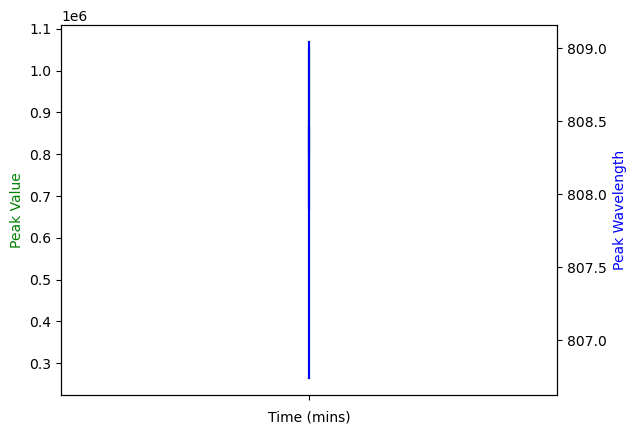

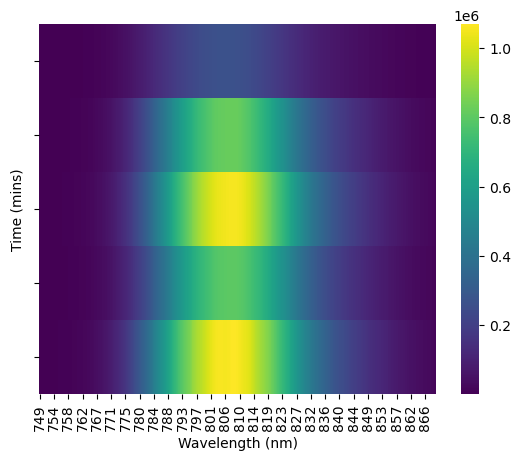

In [12]:
# track the peak size and position against time
stabilities = pl.track_peaks(PL_spectra,mins)
#Plot a heatmap of wavelength against time against inensity using seaborn
pl.plot_heatmap(PL_spectra,mins)